# Logistic Regression [Binary Class]: Predicting Kidney Disease

This notebook demonstrates how to use logistic regression to predict kidney disease based on various health metrics. The dataset used is the Kidney Disease dataset, which contains medical attributes and the corresponding diagnosis labels.

### Case Study: Kidney Disease Dataset

__Problem Statement:__
The goal is to predict the presence or absence of kidney disease based on various health metrics. The dataset includes features such as age, blood pressure, specific gravity, and other medical attributes, along with the diagnosis label for each patient.

The Kidney Disease dataset is a well-known dataset in the field of medical diagnosis and machine learning.

---

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Display all columns in the DataFrame
#pd.set_option('display.max_columns', None)

### 1. Load and Explore the Dataset

In [2]:
df=pd.read_csv('1-kidney_disease.csv')

In [3]:
df.head()

# classification column: 
# ckd: chronic kidney disease, 
# notckd: not chronic kidney disease

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [4]:
df.shape

(400, 26)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [6]:
df.dtypes

id                  int64
age               float64
bp                float64
sg                float64
al                float64
su                float64
rbc                object
pc                 object
pcc                object
ba                 object
bgr               float64
bu                float64
sc                float64
sod               float64
pot               float64
hemo              float64
pcv                object
wc                 object
rc                 object
htn                object
dm                 object
cad                object
appet              object
pe                 object
ane                object
classification     object
dtype: object

Drop `id` column as it is not useful for prediction.

In [7]:
df.drop('id',axis=1,inplace=True)

In [8]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [9]:
df.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [10]:
df.describe().columns # default, numeric columns

Index(['age', 'bp', 'sg', 'al', 'su', 'bgr', 'bu', 'sc', 'sod', 'pot', 'hemo'], dtype='object')

In [11]:
df.describe(include='object').columns # show categorical columns

Index(['rbc', 'pc', 'pcc', 'ba', 'pcv', 'wc', 'rc', 'htn', 'dm', 'cad',
       'appet', 'pe', 'ane', 'classification'],
      dtype='object')

Perform simple cleaning of the dataset to handle missing values.

In [12]:
for i in df.describe().columns: # for numeric columns, fill na with median
    df[i]=df[i].fillna(df[i].median())

In [13]:
for i in df.describe(include='object').columns: # for categorical columns, fill na with mode(i.e.,value that appears most often)
    df[i]=df[i].fillna(df[i].mode()[0])

### 2. Exploratory Data Analysis (EDA)

In [14]:
# Univariant Analysis for quick data explorarion

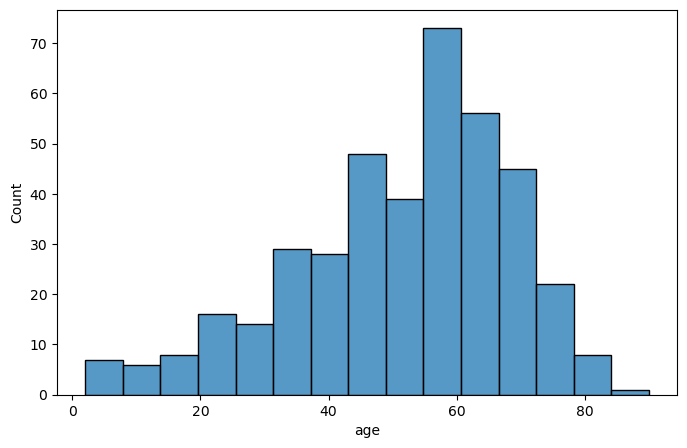

In [15]:
plt.figure(figsize=(8,5))
sns.histplot(df.age);

The histogram shows that most kidney disease patients in this dataset are between 40 and 70 years old, with the highest frequency around 60 years.
The number of younger patients (<30 years) is much smaller, suggesting that kidney disease risk increases with age, which makes age a strong predictor variable in Logistic Regression.

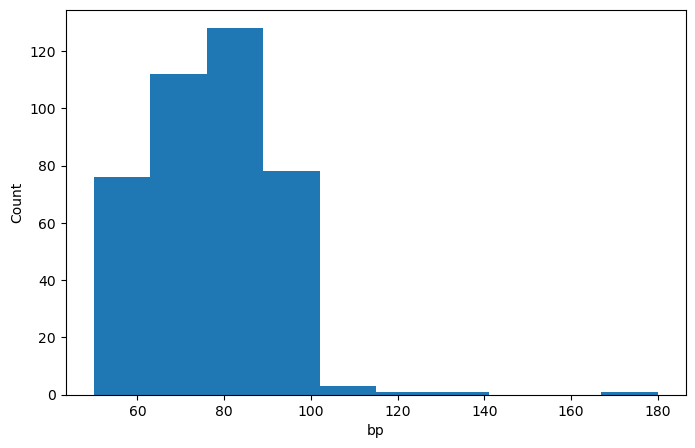

In [16]:
plt.figure(figsize=(8,5))
plt.hist(df.bp) # bp: blood pressure

plt.xlabel("bp")
plt.ylabel("Count");

The histogram shows that most patients have normal blood pressure values between 70 and 90 mmHg, with a few having extremely high values above 120 mmHg.

The distribution is right-skewed, meaning that a small number of patients have unusually high blood pressure readings.

This suggests that while most individuals in the dataset have typical BP levels, a few may suffer from hypertension, which could significantly influence the risk of kidney disease.

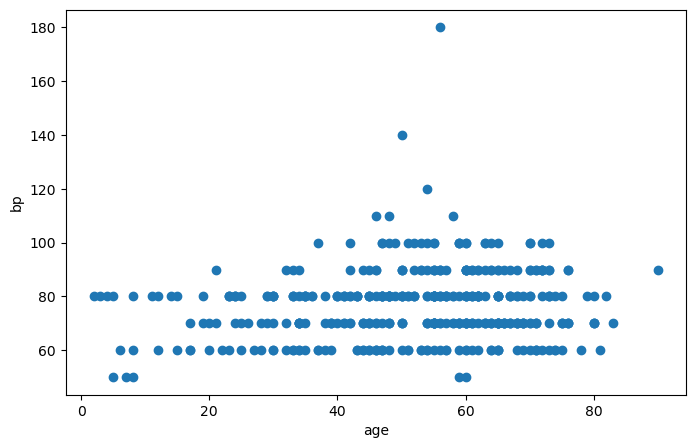

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(df.age, df.bp)

plt.xlabel("age")
plt.ylabel("bp");

The scatter plot shows that blood pressure values range mostly between 60–100 mmHg for all age groups.

Although there is no clear linear relationship between age and bp, older patients (especially above 50 years) tend to show higher and more variable BP levels, including a few extreme hypertensive values (>140 mmHg).

This suggests that age may indirectly influence blood pressure, but other health conditions likely play a significant role.

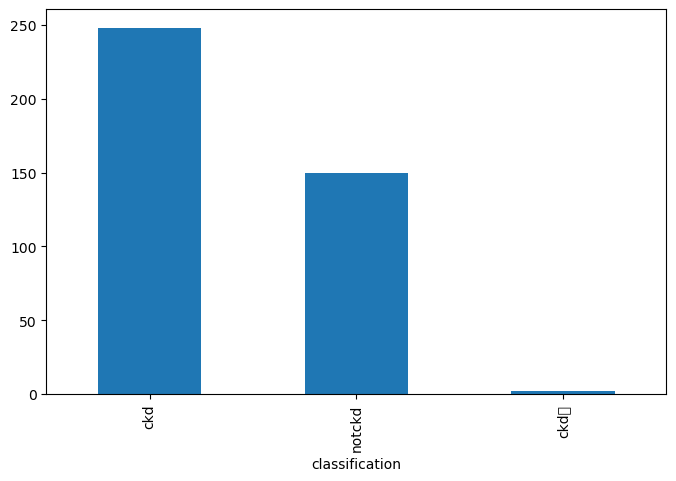

In [18]:
plt.figure(figsize=(8,5))
df['classification'].value_counts().plot.bar();

Notice that the classification column has some discrepancies in the labels.

In [19]:
df.classification.value_counts()

classification
ckd       248
notckd    150
ckd\t       2
Name: count, dtype: int64

Correct the labels in the classification column to ensure consistency.

In [20]:
df.classification.replace('ckd\t','ckd',inplace=True)

In [21]:
df.classification.value_counts()

classification
ckd       250
notckd    150
Name: count, dtype: int64

In [22]:
class_vs_rbc = pd.crosstab(df.classification, df.rbc) # rbc:  red blood cells
class_vs_rbc

rbc,abnormal,normal
classification,,
ckd,47,203
notckd,0,150


CKD patients show abnormal RBC counts, while non-CKD patients do not.
Even though only 47 CKD patients have abnormal RBC, no non-CKD patients show abnormal RBCs — suggesting a strong association between abnormal RBC levels and kidney disease.

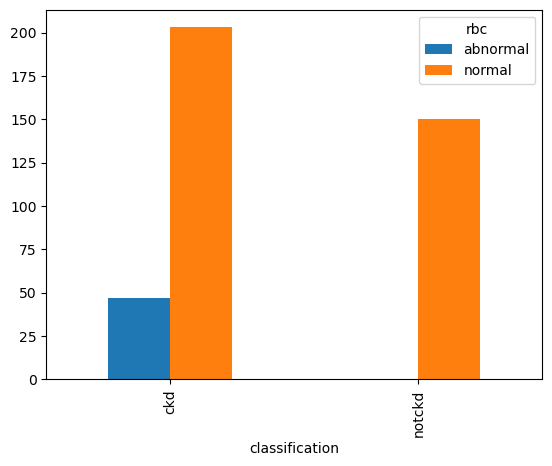

In [23]:
class_vs_rbc.plot(kind='bar');

In [24]:
corr_df = df.corr(numeric_only=True) # for numeric columns, compute their pairwise correlations

In [25]:
corr_df 
# 0: no association; 
# close to 1: strong +ve association; 
# close to -1: strong -ve association

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
age,1.000000,0.136316,-0.160374,0.085918,0.186750,0.230731,0.194291,0.133985,-0.086040,0.049399,-0.178308
bp,0.136316,1.000000,-0.166980,0.123518,0.189561,0.150180,0.180841,0.143184,-0.100705,0.063667,-0.279303
sg,-0.160374,-0.166980,1.000000,-0.479962,-0.292053,-0.299413,-0.244995,-0.171998,0.210791,-0.052935,0.490699
al,0.085918,0.123518,-0.479962,1.000000,0.287751,0.293150,0.347418,0.161310,-0.225612,0.107893,-0.474399
su,0.186750,0.189561,-0.292053,0.287751,1.000000,0.627002,0.126897,0.096434,-0.051758,0.177396,-0.156807
bgr,0.230731,0.150180,-0.299413,0.293150,0.627002,1.000000,0.118859,0.068886,-0.130569,0.052732,-0.254435
bu,0.194291,0.180841,-0.244995,0.347418,0.126897,0.118859,1.000000,0.581517,-0.308806,0.339771,-0.541635
sc,0.133985,0.143184,-0.171998,0.161310,0.096434,0.068886,0.581517,1.000000,-0.624036,0.204751,-0.342492
sod,-0.086040,-0.100705,0.210791,-0.225612,-0.051758,-0.130569,-0.308806,-0.624036,1.000000,0.069612,0.331483
pot,0.049399,0.063667,-0.052935,0.107893,0.177396,0.052732,0.339771,0.204751,0.069612,1.000000,-0.096428


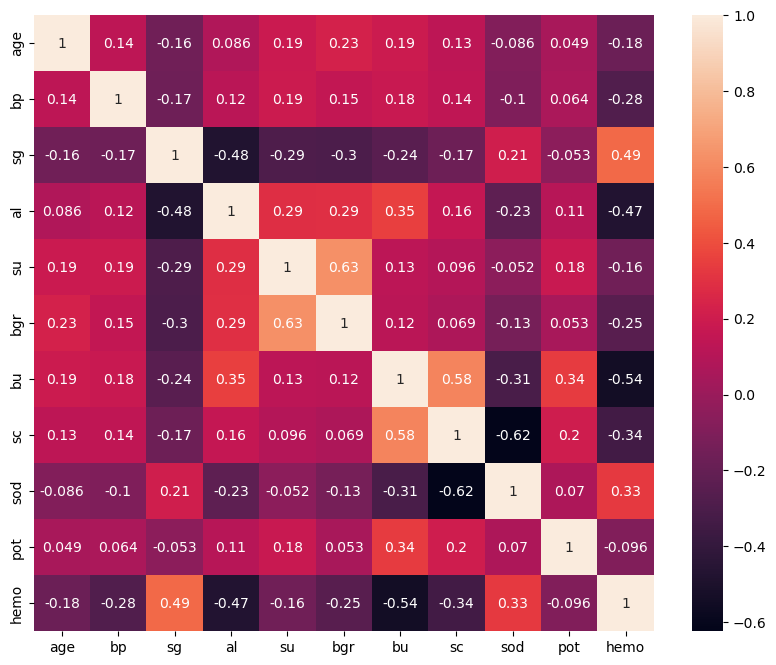

In [26]:
plt.figure(figsize=(10,8))
sns.heatmap(corr_df,annot=True);

The correlation heatmap shows that several biochemical parameters are interrelated.

- bu and sc are strongly positively correlated, reflecting kidney function decline.

    - The heatmap shows that Blood Urea (bu) and Serum Creatinine (sc) are strongly positively correlated (r = 0.58).
    - This means that patients with high urea levels also tend to have high creatinine levels.
    - Both are biochemical markers of kidney function, and their simultaneous elevation indicates that the kidneys are not effectively removing metabolic waste products, which is characteristic of chronic kidney disease (CKD).
        
- su and bgr are also highly correlated, representing glucose-related features.

- sod and sc show a strong negative correlation, suggesting electrolyte imbalance in patients with high creatinine.

Overall, the heatmap helps identify which features are strong predictors, redundant, or weakly related to kidney disease.

### 3. Data Preprocessing/Cleaning

We need to convert categorical variables into numerical format for logistic regression.

But before that, let's check the values of the categorical columns to see if there are any discrepancies.

In [27]:
df.rbc.value_counts()

rbc
normal      353
abnormal     47
Name: count, dtype: int64

In [28]:
df.pc.value_counts()

pc
normal      324
abnormal     76
Name: count, dtype: int64

In [29]:
df.pcc.value_counts()

pcc
notpresent    358
present        42
Name: count, dtype: int64

In [30]:
df.ba.value_counts()

ba
notpresent    378
present        22
Name: count, dtype: int64

In [31]:
df.htn.value_counts()

htn
no     253
yes    147
Name: count, dtype: int64

In [32]:
df.dm.value_counts()

dm
no       260
yes      134
\tno       3
\tyes      2
 yes       1
Name: count, dtype: int64

In [33]:
df.cad.value_counts()

cad
no      364
yes      34
\tno      2
Name: count, dtype: int64

In [34]:
df.appet.value_counts()

appet
good    318
poor     82
Name: count, dtype: int64

In [35]:
df.pe.value_counts()

pe
no     324
yes     76
Name: count, dtype: int64

In [36]:
df.ane.value_counts()

ane
no     340
yes     60
Name: count, dtype: int64

Notice also that values for some categorical columns are not correct. We should rectify these values before proceeding.

In [37]:
df.dm.replace("\tno", "no", inplace=True)
df.dm.replace("\tyes", "yes", inplace=True)
df.dm = df.dm.str.strip()

In [38]:
df.cad.replace("\tno", "no", inplace=True)

In [39]:
df.dm.value_counts()

dm
no     263
yes    137
Name: count, dtype: int64

In [40]:
df.cad.value_counts()

cad
no     366
yes     34
Name: count, dtype: int64

In [41]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,normal,normal,notpresent,notpresent,121.0,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,7.0,50.0,1.020,4.0,0.0,normal,normal,notpresent,notpresent,121.0,18.0,0.8,138.0,4.4,11.3,38,6000,5.2,no,no,no,good,no,no,ckd
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,53.0,1.8,138.0,4.4,9.6,31,7500,5.2,no,yes,no,poor,no,yes,ckd
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,26.0,1.4,138.0,4.4,11.6,35,7300,4.6,no,no,no,good,no,no,ckd


In [42]:
from sklearn.preprocessing import LabelEncoder

In [43]:
lb_rbc = LabelEncoder()
lb_pc = LabelEncoder()
lb_pcc = LabelEncoder()
lb_ba = LabelEncoder()
lb_bgr = LabelEncoder()
lb_htn = LabelEncoder()
lb_dm = LabelEncoder()
lb_cad = LabelEncoder()
lb_appet = LabelEncoder()
lb_pe = LabelEncoder()
lb_ane = LabelEncoder()

In [44]:
df['rbc'] = lb_rbc.fit_transform(df['rbc'])
df['pc'] = lb_pc.fit_transform(df['pc'])
df['pcc'] = lb_pcc.fit_transform(df['pcc'])
df['ba'] = lb_ba.fit_transform(df['ba'])
df['bgr'] = lb_bgr.fit_transform(df['bgr'])
df['htn'] = lb_htn.fit_transform(df['htn'])
df['dm'] = lb_dm.fit_transform(df['dm'])
df['cad'] = lb_cad.fit_transform(df['cad'])
df["appet"] = lb_appet.fit_transform(df["appet"])
df["pe"] = lb_pe.fit_transform(df["pe"])
df["ane"] = lb_ane.fit_transform(df["ane"])

In [45]:
df.rbc.value_counts()

rbc
1    353
0     47
Name: count, dtype: int64

In [46]:
df.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,48,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,1,1,0,0,0,0,ckd
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,48,18.0,0.8,138.0,4.4,11.3,38,6000,5.2,0,0,0,0,0,0,ckd
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,140,53.0,1.8,138.0,4.4,9.6,31,7500,5.2,0,1,0,1,0,1,ckd
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,44,56.0,3.8,111.0,2.5,11.2,32,6700,3.9,1,0,0,1,1,1,ckd
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,33,26.0,1.4,138.0,4.4,11.6,35,7300,4.6,0,0,0,0,0,0,ckd


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             400 non-null    float64
 1   bp              400 non-null    float64
 2   sg              400 non-null    float64
 3   al              400 non-null    float64
 4   su              400 non-null    float64
 5   rbc             400 non-null    int32  
 6   pc              400 non-null    int32  
 7   pcc             400 non-null    int32  
 8   ba              400 non-null    int32  
 9   bgr             400 non-null    int64  
 10  bu              400 non-null    float64
 11  sc              400 non-null    float64
 12  sod             400 non-null    float64
 13  pot             400 non-null    float64
 14  hemo            400 non-null    float64
 15  pcv             400 non-null    object 
 16  wc              400 non-null    object 
 17  rc              400 non-null    obj

Look at `pcv`, `wc`, and `rc` columns, their data types are `object`. These columns should be numeric, but they contain some non-numeric values. We need to clean these columns too.

In [48]:
# Set the display option to show all rows of a DataFrame or Series output
pd.set_option("display.max_rows", None)

# Count the frequency of each unique value in the 'pcv' (Packed Cell Volume) column of the DataFrame 'df'
# This helps identify all unique entries — including any unexpected or incorrectly formatted values such as '\t43' or '\t?'
df.pcv.value_counts()

pcv
41      91
52      21
44      19
48      19
40      16
43      14
42      13
45      13
32      12
36      12
33      12
50      12
28      12
34      11
37      11
30       9
29       9
35       9
46       9
31       8
24       7
39       7
26       6
38       5
53       4
51       4
49       4
47       4
54       4
25       3
22       3
27       3
19       2
23       2
15       1
21       1
17       1
20       1
\t43     1
18       1
9        1
\t?      1
16       1
14       1
Name: count, dtype: int64

In [49]:
#pcv_v_c = df.pcv.value_counts() 
#pcv_v_c[~pcv_v_c.index.str.isnumeric()]

In [50]:
df.wc.value_counts() # unexpected '\t8400', '\t6200', '\t?' are seen

wc
9800      116
6700       10
9600        9
7200        9
9200        9
11000       8
5800        8
6900        8
7800        7
9400        7
9100        7
7000        7
10700       6
10500       6
6300        6
4300        6
9500        5
8600        5
5600        5
5000        5
7500        5
8100        5
10200       5
7900        5
8300        5
6000        4
4700        4
10400       4
6200        4
5500        4
10300       4
6800        4
7700        4
6500        4
6400        3
8400        3
7300        3
4500        3
8000        3
5400        3
7400        3
4200        3
8200        2
12800       2
15200       2
12400       2
8800        2
5700        2
9300        2
9000        2
6600        2
5300        2
8500        2
11400       2
13200       2
7100        2
3800        2
14600       2
4900        1
12000       1
15700       1
4100        1
11500       1
13600       1
12200       1
18900       1
9900        1
5200        1
5900        1
12100       1
9700        1
510

In [51]:
df.rc.value_counts() # unexpected '\t?' is seen

rc
5.2    148
4.5     16
4.9     14
4.7     11
4.8     10
3.9     10
4.6      9
3.4      9
5.9      8
5.5      8
6.1      8
5.0      8
3.7      8
5.3      7
5.8      7
5.4      7
3.8      7
5.6      6
4.3      6
4.2      6
3.2      5
4.4      5
5.7      5
6.4      5
5.1      5
6.2      5
6.5      5
4.1      5
3.6      4
6.3      4
6.0      4
4.0      3
3.3      3
4        3
3.5      3
2.9      2
3.1      2
2.6      2
2.1      2
2.5      2
2.8      2
3.0      2
2.7      2
5        2
2.3      1
\t?      1
2.4      1
3        1
8.0      1
Name: count, dtype: int64

In [52]:
df.wc.replace('\t6200',6200,inplace=True)

In [53]:
df.wc.replace('\t8400',8400,inplace=True)

In [54]:
df.pcv.replace('\t43',43,inplace=True)

In [55]:
txt_df = df[(df['rc'] == '\t?') | 
           (df['wc'] == '\t?') | 
           (df['pcv'] == '\t?')]

txt_df

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
66,67.0,70.0,1.02,2.0,0.0,0,1,0,0,70,55.0,1.6,131.0,4.8,12.65,\t?,9800,5.2,1,1,0,0,1,0,ckd
162,59.0,70.0,1.02,0.0,0.0,1,1,0,0,90,34.0,1.5,124.0,4.1,9.80,37,6000,\t?,0,1,0,0,0,0,ckd
185,4.0,80.0,1.02,1.0,0.0,1,1,0,0,26,23.0,0.6,138.0,4.4,12.00,34,\t?,5.2,0,0,0,0,0,0,ckd


In [56]:
df.drop(txt_df.index, inplace=True)

df.shape

(397, 25)

In [57]:
# Convert the target column to binary (0 or 1)
# Assuming the target column is 'classification'
df['classification'] = df['classification'].map({'ckd': 1, 'notckd': 0})

Separate features and target variable. Then, split the dataset into training and testing sets.

In [58]:
X = df.drop('classification', axis=1)
y = df['classification']

In [59]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=1234)

In [60]:
X_train.shape, y_train.shape

((277, 24), (277,))

In [61]:
X_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,48,36.0,1.2,138.0,4.4,15.4,44,7800,5.2,1,1,0,0,0,0
349,35.0,70.0,1.025,0.0,0.0,1,1,0,0,9,36.0,1.1,150.0,3.5,14.5,52,9400,6.1,0,0,0,0,0,0
372,72.0,60.0,1.020,0.0,0.0,1,1,0,0,36,26.0,0.9,150.0,4.9,15.0,52,10500,5.5,0,0,0,0,0,0
75,5.0,80.0,1.015,1.0,0.0,1,1,0,0,48,16.0,0.7,138.0,3.2,8.1,41,9800,5.2,0,0,0,0,0,1
225,60.0,90.0,1.010,3.0,5.0,0,1,0,1,145,95.0,2.7,131.0,3.8,11.5,35,12000,4.5,1,1,0,0,0,0


In [62]:
X_test.shape, y_test.shape

((120, 24), (120,))

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc = StandardScaler()

sc.fit(X_train)

StandardScaler()

In [65]:
# Import the StandardScaler class from scikit-learn
from sklearn.preprocessing import StandardScaler

# Create an instance of the StandardScaler
# StandardScaler standardizes features by removing the mean and scaling to unit variance
sc = StandardScaler()

# Fit the scaler on the training data
# This calculates the mean and standard deviation for each feature in X_train
sc.fit(X_train)

# Transform the training data using the fitted scaler
# Each feature in X_train is scaled using the formula:
#   z = (x - mean) / standard_deviation
# This ensures that all features have mean = 0 and standard deviation = 1
X_train_scaled = sc.transform(X_train)

# Apply the same transformation to the test data
# We use the SAME mean and standard deviation learned from the training data
# to ensure the model evaluates data consistently
X_test_scaled  = sc.transform(X_test)

In [66]:
X_train = pd.DataFrame(X_train_scaled, columns=X.columns)
X_train.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.194170,0.270689,0.395722,0.165685,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-0.142769,-0.397359,-0.283051,0.018701,-0.082826,1.036186,0.533081,-0.348439,0.363575,1.373105,1.406590,-0.263625,-0.520233,-0.486423,-0.416808
1,-0.949253,-0.457281,1.332603,-0.639486,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-1.266102,-0.397359,-0.298756,1.180611,-0.350642,0.692217,1.524942,0.261226,1.437499,-0.728277,-0.710939,-0.263625,-0.520233,-0.486423,-0.416808
2,1.199829,-1.185251,0.395722,-0.639486,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-0.488410,-0.598013,-0.330165,1.180611,0.065960,0.883311,1.524942,0.680370,0.721549,-0.728277,-0.710939,-0.263625,-0.520233,-0.486423,-0.416808
3,-2.691752,0.270689,-0.541159,0.165685,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-0.142769,-0.798667,-0.361574,0.018701,-0.439914,-1.753790,0.161133,0.413642,0.363575,-0.728277,-0.710939,-0.263625,-0.520233,-0.486423,2.399187
4,0.502829,0.998659,-1.478039,1.776028,4.362858,-3.042903,0.446245,-0.328634,4.506406,2.651160,0.786497,-0.047482,-0.659080,-0.261370,-0.454349,-0.582763,1.251931,-0.471700,1.373105,1.406590,-0.263625,-0.520233,-0.486423,-0.416808


In [67]:
X_test = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test.head()

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc,htn,dm,cad,appet,pe,ane
0,-0.310337,0.998659,-1.478039,0.970856,-0.376403,0.328634,-2.240924,-0.328634,-0.221906,-0.776444,0.485517,-0.141710,0.018701,-0.082826,-0.607225,-0.954711,0.146914,-0.948999,1.373105,-0.710939,-0.263625,-0.520233,-0.486423,-0.416808
1,0.154330,0.270689,-1.478039,1.776028,-0.376403,-3.042903,-2.240924,-0.328634,-0.221906,1.095777,0.425321,0.517883,-0.368602,0.036203,-1.142289,-1.450642,0.413642,0.363575,1.373105,1.406590,-0.263625,1.922216,2.055825,-0.416808
2,-1.297753,0.270689,0.395722,-0.639486,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-1.496529,-0.798667,-0.361574,0.018701,-0.350642,0.386466,1.772907,-1.262935,1.079524,-0.728277,-0.710939,-0.263625,-0.520233,-0.486423,-0.416808
3,0.444746,1.726629,0.395722,-0.639486,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-0.142769,0.806563,0.533587,0.018701,-0.082826,-2.327073,0.161133,0.413642,0.363575,1.373105,1.406590,-0.263625,-0.520233,-0.486423,2.399187
4,-0.833087,-1.185251,0.395722,-0.639486,-0.376403,0.328634,0.446245,-0.328634,-0.221906,-0.488410,-0.176640,-0.298756,0.309178,0.065960,0.883311,1.029011,-0.653271,0.363575,-0.728277,-0.710939,-0.263625,-0.520233,-0.486423,-0.416808


In [68]:
y.value_counts()

classification
1    247
0    150
Name: count, dtype: int64

### 4. Model Training and Evaluation

In [69]:
# FINALLY!
# after all the data processing steps,
# we import the lgr model

from sklearn.linear_model import LogisticRegression

In [70]:
lgr = LogisticRegression()

In [71]:
lgr.fit(X_train,y_train)

LogisticRegression()

In [72]:
#Make predictions
y_pred = lgr.predict(X_test_scaled)             # Predict class labels
y_pred_prob = lgr.predict_proba(X_test_scaled)[:, 1]  # Predict probabilities

In [73]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, roc_auc_score

In [74]:
#Accuracy
print("Accuracy:", accuracy_score(y_test, y_pred).round(2))

Accuracy: 0.98


In [75]:
y_test.value_counts()

classification
1    81
0    39
Name: count, dtype: int64

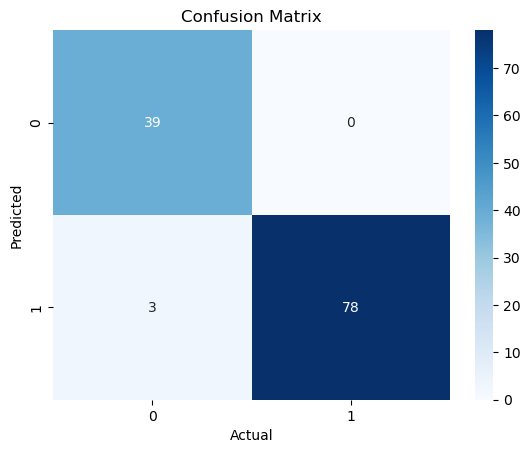

In [90]:
#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [77]:
#Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.93      1.00      0.96        39
           1       1.00      0.96      0.98        81

    accuracy                           0.97       120
   macro avg       0.96      0.98      0.97       120
weighted avg       0.98      0.97      0.98       120



- Support is the number of actual occurrences of the class in the specified dataset
- weighted avg is just the weighted (based on support) sum from each respective column of the classification_report
- macro avg is a special weighted avg, where equal weights are applied.


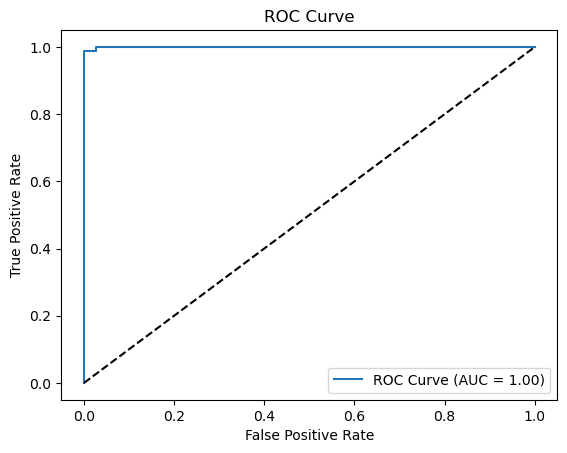

In [78]:
#ROC Curve & AUC
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
auc = roc_auc_score(y_test, y_pred_prob)

plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")
plt.plot([0,1],[0,1],'k--')  # Diagonal line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

In [79]:
tpr_fpr = pd.DataFrame( { 'tpr': tpr, 'fpr': fpr, 'thresholds': thresholds } )

In [80]:
tpr_fpr['diff'] = tpr_fpr.tpr - tpr_fpr.fpr

In [81]:
tpr_fpr.sort_values( 'diff', ascending = False )[0:10]

,tpr,fpr,thresholds,diff
2,0.987654,0.000000,0.358380,0.987654
4,1.000000,0.025641,0.245611,0.974359
3,0.987654,0.025641,0.340141,0.962013
1,0.012346,0.000000,1.000000,0.012346
0,0.000000,0.000000,2.000000,0.000000
5,1.000000,1.000000,0.000268,0.000000


In [82]:
#Find the best classification threshold
# fpr, tpr, thresholds we already got from roc_curve(...)
# We will choose the threshold that maximizes (TPR - FPR)
youden_index = tpr - fpr
best_idx = np.argmax(youden_index)          # index of best threshold
best_threshold = thresholds[best_idx]
best_tpr = tpr[best_idx]
best_fpr = fpr[best_idx]

print(f"Best threshold (Youden's J): {best_threshold:.3f}")
print(f"TPR (recall) at this threshold: {best_tpr:.3f}")
print(f"FPR at this threshold: {best_fpr:.3f}")

Best threshold (Youden's J): 0.358
TPR (recall) at this threshold: 0.988
FPR at this threshold: 0.000


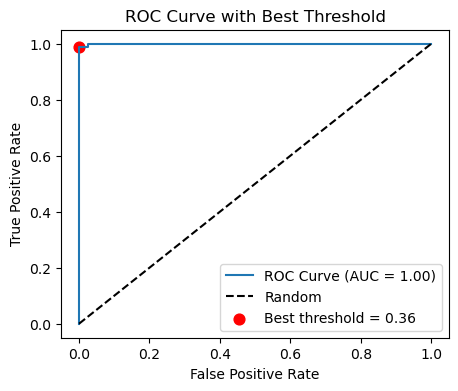

In [83]:
plt.figure(figsize=(5,4))

# ROC curve
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc:.2f})")

# Random guess line
plt.plot([0, 1], [0, 1], 'k--', label='Random')

# Mark the best point
plt.scatter(best_fpr, best_tpr, color='red', s=60, 
            label=f"Best threshold = {best_threshold:.2f}")

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve with Best Threshold')
plt.legend(loc='lower right')
plt.show()


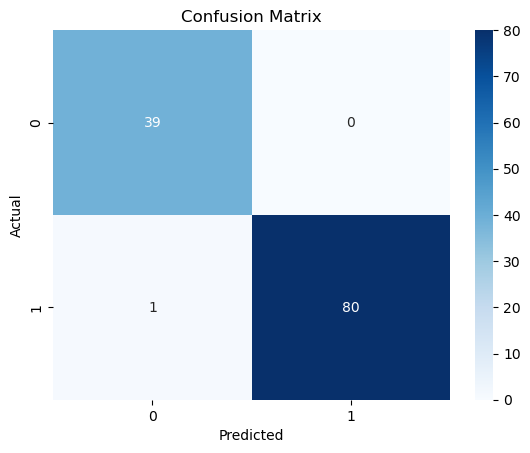

Accuracy with best threshold: 0.99

Classification Report with best threshold:
              precision    recall  f1-score   support

           0       0.97      1.00      0.99        39
           1       1.00      0.99      0.99        81

    accuracy                           0.99       120
   macro avg       0.99      0.99      0.99       120
weighted avg       0.99      0.99      0.99       120



In [84]:
# get probabilities for the positive class
y_prob = lgr.predict_proba(X_test_scaled)[:, 1]

# convert probabilities to 0/1 using our chosen threshold
y_pred_best = (y_prob >= best_threshold).astype(int)

#Confuion Matrix
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print("Accuracy with best threshold:",
      accuracy_score(y_test, y_pred_best).round(2))

print("\nClassification Report with best threshold:")
print(classification_report(y_test, y_pred_best))


We used the ROC curve to test many thresholds.

For each threshold we computed TPR (how many sick people we correctly caught) and FPR (how many healthy people we wrongly flagged).

We then chose the threshold where TPR − FPR is maximum — this gives us the best trade-off between sensitivity and specificity.

We plotted this point on the ROC curve (red dot) and used it to make new predictions.

### Introduction to Confusion Matrix and Classification Metrics

A **confusion matrix** is a performance evaluation tool for classification models. It provides detailed insights into how well a classification algorithm performs, breaking down predictions into four categories:

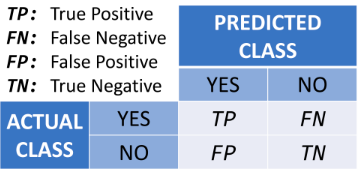


### Key Terms in the Confusion Matrix
1. **True Positive (TP)**: The model correctly predicted a positive outcome.
2. **True Negative (TN)**: The model correctly predicted a negative outcome.
3. **False Positive (FP)**: The model predicted positive when it is actually negative (Type I error).
4. **False Negative (FN)**: The model predicted negative when it is actually positive (Type II error).

---

### How to Calculate and Interpret Metrics
Using the values from the confusion matrix, you can derive important classification metrics:

#### 1. **Accuracy** 
   - **Formula**:  
     
     $${Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}$$
     
   - **Interpretation**: The percentage of all predictions (positive and negative) that are correct.
   - **Limitation**: Can be misleading for imbalanced datasets (e.g., when one class dominates).

#### 2. Precision (Positive Predictive Value)  
   - **Formula**:  
     
     $${Precision} = \frac{TP}{TP + FP}$$
    
   - **Interpretation**: Of all instances predicted as positive, how many are actually positive.
   - **Importance**: High precision reduces false positives.

#### 3. Recall (Sensitivity or True Positive Rate)  
   - **Formula**:  
   
     $${Recall} = \frac{TP}{TP + FN}$$
  
   - **Interpretation**: Of all actual positives, how many were correctly predicted.
   - **Importance**: High recall reduces false negatives.

#### 4. F1-Score (Harmonic Mean of Precision and Recall) 
   - **Formula**:  
    
     $${F1-Score} = 2 \cdot \frac{\text{Precision} \cdot \text{Recall}}{\text{Precision} + \text{Recall}}$$
    
   - **Interpretation**: A balanced metric that considers both precision and recall. Useful for imbalanced datasets.

---

### Evaluating Model Performance
- **Single Accuracy**:
  - Simpler but less informative for imbalanced datasets.
  - Example: If 90% of data belongs to one class, a model predicting only that class achieves 90% accuracy without identifying any minority-class samples.

- **Confusion Matrix**:
  - Provides a detailed breakdown of correct and incorrect predictions.
  - Helps calculate additional metrics like precision, recall, and F1-score to better evaluate model performance in complex scenarios.

---

### Example of Imbalanced Dataset
- Dataset: 100 samples, 95 negatives, 5 positives.
- Model predicts all negatives:
  - Accuracy: 95% (good score).
  - Recall: 0% for the positive class (poor performance).
  
Using only accuracy hides the model's inability to predict the minority class.

---

A **confusion matrix** and derived metrics like **precision**, **recall**, and **F1-score** provide a more comprehensive view of model performance than accuracy alone, especially in cases with imbalanced datasets or when certain types of errors (e.g., false positives or false negatives) are more costly.